In [1]:
import pandas as pd
import numpy as np
import warnings

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

pio.templates.default = "ggplot2"

#dataframe display settings
pd.set_option('display.max_columns', 5000000)
pd.set_option('display.max_rows', 50000000)

In [2]:
## Data from dataset 2
founders = pd.read_csv('data/dataset2.csv')

In [4]:
founders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Full Name                        18361 non-null  object
 1   Primary Job Title                18361 non-null  object
 2   Bio                              18361 non-null  object
 3   Gender                           18361 non-null  int64 
 4   Number of News Articles          18361 non-null  int64 
 5   Number of Founded Organizations  18361 non-null  int64 
 6   Number of Portfolio Companies    18361 non-null  int64 
 7   Number of Investments_x          18361 non-null  int64 
 8   Number of Partner Investments    18361 non-null  int64 
 9   Number of Lead Investments_x     18361 non-null  int64 
 10  Number of Exits_x                18361 non-null  int64 
 11  Number of Events_x               18361 non-null  int64 
 12  Categories                      

In [7]:
founders.columns

Index(['Full Name', 'Primary Job Title', 'Bio', 'Gender',
       'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       'Headquarters Location ', 'Operating Status', 'Founded Date',
       'Closed Date', 'Company Type', 'Number of Founders', 'Success',
       'Founder'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler

standarizer = StandardScaler()

standarized_df = standarizer.fit_transform(founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                                                     'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                                                     'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                                                     'Operating Status', 'Founded Date', 'Closed Date', 
                                                     'Company Type', 'Number of Founders', 'Success',
                                                     'Founder' ]])

standarized_df = pd.DataFrame(standarized_df, columns=['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                                                     'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                                                     'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                                                     'Operating Status', 'Founded Date', 'Closed Date', 
                                                     'Company Type', 'Number of Founders', 'Success',
                                                     'Founder' ])

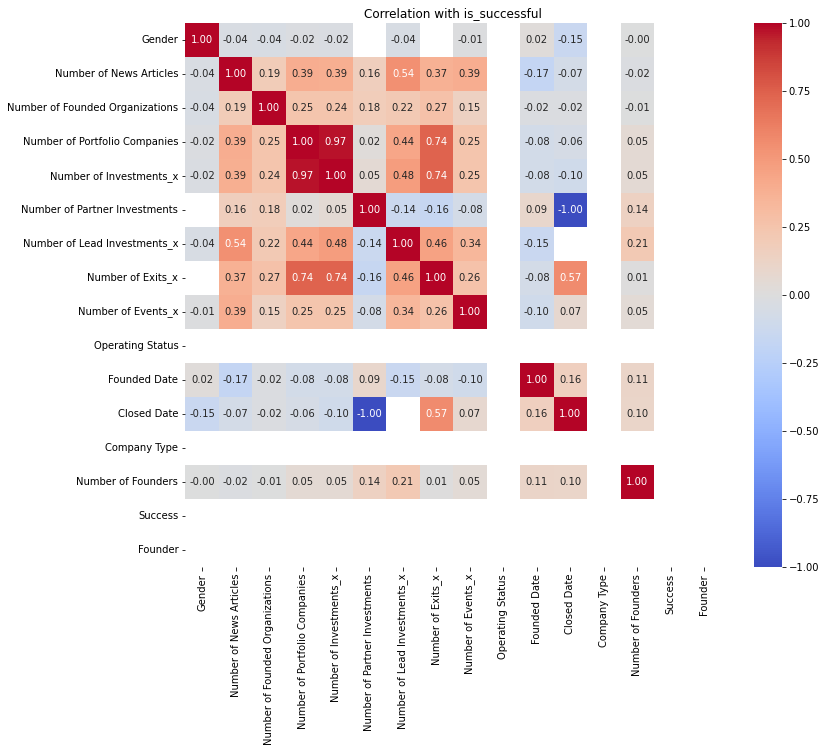

In [16]:
# Calculate the correlation matrix
founders_df = founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                        'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                        'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                        'Operating Status', 'Founded Date', 'Closed Date', 
                        'Company Type', 'Number of Founders', 'Success',
                        'Founder' ]]
correlation_matrix = np.log(founders_df).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation with is_successful')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = standarized_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation with is_successful')
plt.show()